<a href="https://colab.research.google.com/github/jorge673/ADA-INFORMES-/blob/main/informe-ProblemaDeVarillas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Descripcion del problema**
---
##Problema de corte de varrillas
**inicio**:Largo de una varilla y un arrelgo con los precio de cada tamaño de cada varilla $p_i=[p_1,p_2,p_3,...,p_i]$

**salida**:el $r_i$ con mayor precio, el cual es el precio que cortas y vendes las varillas 

>![imagen 1](https://i.imgur.com/CxesTZe.png)

El problema nos permite resolver el algoritmo de dos maneras; de forma recursiva y con programacion dinamica 

la verdad que apesar de que es muy simple lo que mas se quiere de este porblema es su eficiencia, con esto se refiere por ejemplo que no se calculen dos o mas veces el mismo problema

#**2. Descripcion del alogritmo**
---
##2.1 **Recursivo**


In [204]:
import sys 

def rodCut(price, n,verbose=False):

    global recurciones

    if n == 0:
        return 0
    maxValue = -sys.maxsize

    recurciones+=1
 
    for i in range(1, n + 1):

        a=rodCut(price, n - i)
 
        cost = price[i - 1] + rodCut(price, n - i,verbose)

        if(verbose):
          
          print("RodCut de vara tamaño",n)
          print("   vara de tamaño ",i,"=",price[i-1],"\n   rodCut de",n-i," =",a,"\n   costo =",cost,)
 
        if cost > maxValue:
            
            maxValue = cost
            if(verbose):
              print("-------Valor maximo =",cost,"\n")
        elif verbose:
            print("\n")

    if(verbose):
      print("VALOR DE RETORNO de rodcut de",n," es de",maxValue,"\n------------------------------------\n")
 
    return maxValue

recurciones=0

c=[1,1,1,1,1]

print(rodCut(c,4,False), recurciones)

4 27


##2.1.1 **Descripcion recursivo**
---
El algoritomo hace la siguientes operaciones:
>recive 2 paramaetros:
>* `price`: es el arrelgo con el precio de cada vara de tamaño $i$
>* `n`: es el la longitud de la barrilla 
>
>Este genera un valor maximo=(el menor numero posible) y luego trata de buscar la mejor manera de cortar la varrilla de tamaño n para conseguir esto el aglorimo itera $i$ en un intervalo entre $[1,n+1]$.
>
>Calcula el costo de entre la varilla $i$ y la varilla $n-i$ y analisa si este es el maximo.
>
>Por ultimo el algorimo retorna el valor maximo.

este algoritmo usa el paradigma divide y venceras para resolver este porblema, lo que hace que divida el problema en mas sub-problemas para luego resolverlos y juntarlos.

##2.1.2 **Ejemplo**
---

veamos un caso de una varilla de tamaño 4:



![imagen1](https://www.techiedelight.com/wp-content/uploads/Rod-Cutting-Problem.png)

A pezar que pueda entrega un resulatado claro este tiene un problema y es que puede lleagar a resolver dos o mas veces un mismo problema, como por ejemplo de la imagen anterior el cual repite dos veces el trabajo de la varilla de tamaño 2

para solucionar esto podemos usar Programacion dinamica para resolver 






### 2.1.3 **Ejemplo Codigo**

In [156]:

precios=[1,2,2,5,8]
recurciones=0
print("valor maximo =",rodCut(c,4,True),"\nCantidad de llamada a CutRod", recurciones)

RodCut de vara tamaño 1
   vara de tamaño  1 = 1 
   rodCut de 0  = 0 
   costo = 1
-------Valor maximo = 1 

VALOR DE RETORNO de rodcut de 1  es de 1 
------------------------------------

RodCut de vara tamaño 2
   vara de tamaño  1 = 1 
   rodCut de 1  = 1 
   costo = 2
-------Valor maximo = 2 

RodCut de vara tamaño 2
   vara de tamaño  2 = 1 
   rodCut de 0  = 0 
   costo = 1


VALOR DE RETORNO de rodcut de 2  es de 2 
------------------------------------

RodCut de vara tamaño 3
   vara de tamaño  1 = 1 
   rodCut de 2  = 2 
   costo = 3
-------Valor maximo = 3 

RodCut de vara tamaño 1
   vara de tamaño  1 = 1 
   rodCut de 0  = 0 
   costo = 1
-------Valor maximo = 1 

VALOR DE RETORNO de rodcut de 1  es de 1 
------------------------------------

RodCut de vara tamaño 3
   vara de tamaño  2 = 1 
   rodCut de 1  = 1 
   costo = 2


RodCut de vara tamaño 3
   vara de tamaño  3 = 1 
   rodCut de 0  = 0 
   costo = 1


VALOR DE RETORNO de rodcut de 3  es de 3 
--------------------

Como Vemos el algoritmo repite varias veces el mismo trabajo lo cual lo vuelve muy ineficiente ya que logra tener una complejidad temporal de $O(2^n)$

#2.2 **Programacion Dinamica**


In [288]:
def bottomUp(p,n,cont=0,verbose=False):
  
  r=[0 for i in range(0,n+1)]

  if(verbose):
    print("Creamos el arreglo r de tamaño",n)
    r=[0 for i in range(0,n+1)]
  for i in range(1,n+1):
    #dejamos el q en el menor numero posible en nuestro caso como la varillas tienen un precio deducimos que no puede ser negativo
    q = -1 

    if(verbose):
      print("VARILLA :",i,"\n")

    for j in range(0,i):
      
      if(verbose):
            print("   >p["+str(j)+"] + r["+str(i-j-1)+"] =",p[j]+r[i-j-1])
      
      #Calculamos el maximo
      if(q<p[j]+r[i-j-1]):

         #contamos la cantidad de comparaciones
         
            
          cont+=1
          q=p[j]+r[i-j-1]
          if(verbose):
            print("   >cambio de maximo : p["+str(j)+"] =",p[j],"+ r["+str(i-j-1)+"] =",r[i-j-1],"es igual a",q)

    if(verbose):
      print("\nValor del rod de la varilla",i," es",q,"\n")

    r[i]=q

  
  return r[n],cont

c=[1,1,1,1,1]

print(bottomUp(c,4,0,False))

(4, 4)


##2.2.1 **bottom-up**
---

El algoritmo hace lo siguiente:

>se ingresan dos parametros:
>* `price`: es el arrelgo con el precio de cada vara de tamaño $i$
>* `n`: es el la longitud de la barrilla 
>
>Genera un arreglo de tamaño n llamado `r`
>
>Itera i de **1 hasta n+1** Y deja a q con un valor negativo
>
>luego itera j de **o hasta i** y compara que `q<p[j]+r[i-j-1]`
>
>si lo ultimo ocurre se guarda el valor de `p[j]+r[i-j-1]` como el maximo
>
>al terminar la iteracion de j se le da el valor de `r[j]` el maximo que calulamos antes
>
>al terminar el algotimo se retorna `r[n]` que contiene el maximo el cual se estaba buscando

Al recorrer solo dos veces el algoritmo le permite guardar los resultados de los problemas obtenidos en un arrglo (`r`) y asi conseguir el resultado en mucho menos tiempo que el metodo recusivo.

In [289]:
c=[1,2,1,3,63,63,81]

a,null=bottomUp(c,7,0,True)

print("El valor maximo de la varilla 7 es",a)

Creamos el arreglo r de tamaño 7
VARILLA : 1 

   >p[0] + r[0] = 1
   >cambio de maximo : p[0] = 1 + r[0] = 0 es igual a 1

Valor del rod de la varilla 1  es 1 

VARILLA : 2 

   >p[0] + r[1] = 2
   >cambio de maximo : p[0] = 1 + r[1] = 1 es igual a 2
   >p[1] + r[0] = 2

Valor del rod de la varilla 2  es 2 

VARILLA : 3 

   >p[0] + r[2] = 3
   >cambio de maximo : p[0] = 1 + r[2] = 2 es igual a 3
   >p[1] + r[1] = 3
   >p[2] + r[0] = 1

Valor del rod de la varilla 3  es 3 

VARILLA : 4 

   >p[0] + r[3] = 4
   >cambio de maximo : p[0] = 1 + r[3] = 3 es igual a 4
   >p[1] + r[2] = 4
   >p[2] + r[1] = 2
   >p[3] + r[0] = 3

Valor del rod de la varilla 4  es 4 

VARILLA : 5 

   >p[0] + r[4] = 5
   >cambio de maximo : p[0] = 1 + r[4] = 4 es igual a 5
   >p[1] + r[3] = 5
   >p[2] + r[2] = 3
   >p[3] + r[1] = 4
   >p[4] + r[0] = 63
   >cambio de maximo : p[4] = 63 + r[0] = 0 es igual a 63

Valor del rod de la varilla 5  es 63 

VARILLA : 6 

   >p[0] + r[5] = 64
   >cambio de maximo : p[0]

#3. **Correctitud**
---
##3.1 **Bottom-Up** 

**Teorema**:

>_"Bottom-Up se le entrega un arreglo de precios y el largo de la varilla y entrega el valor maximo que se puede vender la varilla del largo ingresado"_

Para probar esto podemos usar inducion matematica:

Definimos lo siguiente.

* **Caso base $p(1)$**: cuando la varilla tiene tamaño 1, esta no se puede divir en mas partes por lo cual se retorna el valor establecido por el arreglo de precios, esto es trivialmente correcto.

* **Caso General $p(n)$**: si queremos calcular el caso p tenemos que calcular los problemas que son menores a este $p(m)$ siedo $m < n$. Calculara todos los casos hasta llegar al caso base que es p(1).

cuando entregamos una varilla de largo n el algoritmo iterara y caluclara los problemas de tamaño `r[j]+r[j-i+1]` y lo compara con `q` para sacar el maximo valor, esto hata que llegen al caso base, luego el algoritmo entrega el valor maximo.

#**4. Complejidad**
---

##4.1 **Complejidad Temporal**

Bottom-up recorre el arreglo dentro de 2 iteraciones

* $i$ que recorre de 1 hasta n+1
* $j$ que recorre de 1 hasta $i$

Para calcular su complejidad se puede representar de la siguiente manera:

> $$\sum_{i=1}^{n+1}\sum_{j=0}^{i}{j}$$

**Separamos las sumatorias:**

>$$\sum_{i=1}^{n+1}i=O(n)$$
>$$\sum_{j=0}^{i}{j}=[1,2,3,...,i]=O(n)$$

**Juntamos sus resultados:**
>$$O(n)*O(n)=O(n^2)$$


De esta manera podemos concluir que la complejidad temporar es de $O(n^2)$

##4.2 **Complejidad espacial**

Primero calulamos la complejidad de cada operacion

* El algoritmo genera un arreglo de tamaño $n$ el cual es `r[]` por lo cual esto genera un a compljidad espacial de $O(n)$ 

* Las demas operaciones directamente solo cambian valores ya predefinidos por lo cual su complejidad es de $O(1)$ ya que no generan nuevos valores


Si juntamos ambas cotas no da que la complejidad es 

$$O(n)*O(1)=O(n)$$

Por conclusion la complejidad del algoritmo es de $O(n)$

#**5. Experimentacion**
---

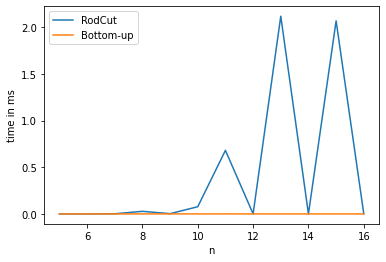

In [222]:
import datetime
import random
import matplotlib.pyplot as plt
from timeit import repeat


ix=[]; iy=[]

for n in range(5,17):

  a = random.sample(range(1, 30), n)
  i = random.randint(1,n)

  
  t = repeat(setup="from __main__ import rodCut", stmt=f"rodCut({a},{i})", repeat=1, number=10)

  ix.append(n)
  iy.append(t)

bx=[]; by=[]

for n in range(5,17):

  a = random.sample(range(1, 30), n)
  i = random.randint(1,n)
  t = repeat(setup="from __main__ import bottomUp", stmt=f"bottomUp({a},{i})", repeat=1, number=10)

  bx.append(n)
  by.append(t)


plt.plot(ix,iy)
plt.plot(bx,by)
plt.legend(["RodCut", "Bottom-up"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

##5.1 **Comparacion de tiempos**

Observaciones:

* rodCut se demora mucho mas tiempo que bottom-up.
* rodCUt en algunos casos llega a demorar lo mismo que bottom-up n = ([0,9], 12, 14, 16).
* bottom-up parce no tener varaciones de tiempo, porque tiende a 0.0.

concluciones:

bottom-up parece ser una opcion mas optima que rodCut ya que no varia en su tiempo de ejecucion y llega ser mucho mas rapido como se ve en la muestra tardando solo milisegundos debido a la complejidad $o(n^2)$ superior a la de Rodcut que es $o(2^n)$

nota: tube que reducir los casos de comparaciones porque RodCut se demora demaciado 

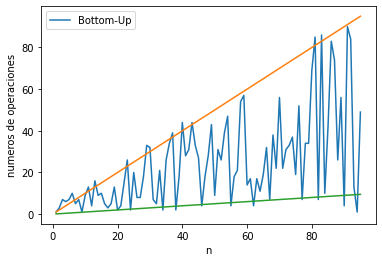

In [249]:
import matplotlib.pyplot as plt

x=[n for n in range(1,96)]
y=[]; 
y1=[n for n in range(1,96)]
y2=[n*0.1 for n in range(1,96)]
for n in range(5,100):
  a = [m for m in range(1,n+1)] 
  i = random.randint(1,n)
  a,counter = bottomUp(a,i)
  y.append(counter)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Bottom-Up"])



plt.xlabel('n')
plt.ylabel('numeros de operaciones')
plt.show()

Observaciones:

* Parece la cantidad de comparaciones de botom-up tienden a dos lineas las cuales coloque para tratar de sacar concluciones
* mientras mas elementos tenga mas puede llegar a demorar (debido a la complejidad temporal de $O(n^2)$ ) 
* una de las razones que varie tanto su tamaño es debido a que paramatro se le asigna `n` ya que en este esperimento utilize numeros aleatorios para elejir estos

conclusiones:

los numeros de comparaciones tienende estar entre dos rectas la naraja que es $n$ y la verde que es $n/10$, se puede casi asegurar que el numeros de comparaciones no pasa la liena naraja y en los caso que llega hacerlo no llega a ser mucha la diferencia, lo mismo pasa con la linea verde, aunque esto es mera especulacion, se necesitaria mas informacion para probar esto